# Liar Dataset

Implement preprocessing functions in this notebook depending on whatever classifier you're training and just import whichever functions you need into your own model notebook.

## General Imports

In [7]:
from datasets import load_dataset
import tqdm as notebook_tqdm
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Labels \\
0 ~ false \\
1 ~ half-true \\
2 ~ mostly true \\
3 ~ true \\
4 ~ barely true \\

## Dataset Pre-processing

In [4]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, f1_score


In [5]:
dataset = load_dataset('liar')

Generating validation split: 100%|██████████| 1284/1284 [00:00<00:00, 12542.71 examples/s]


Split train/test datasets into 5 separate datasets, format labels in binary

In [6]:
train = dataset['train']
test = dataset['test']
validation = dataset['validation']

In [79]:
x_train = train['statement']
y_train = train['label']
x_test = test['statement']
y_test = test['label']
print(y_train)
label_mapping = {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5:1}
y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]

print(len(y_train))



[0, 1, 2, 0, 1, 3, 4, 1, 1, 2, 2, 1, 0, 2, 4, 1, 3, 4, 1, 2, 0, 2, 2, 1, 4, 0, 2, 1, 0, 2, 3, 4, 0, 2, 2, 3, 3, 3, 5, 3, 0, 1, 5, 5, 0, 1, 5, 0, 5, 3, 4, 4, 0, 3, 4, 1, 1, 4, 0, 2, 0, 2, 3, 2, 0, 5, 3, 0, 4, 4, 3, 4, 2, 2, 2, 3, 0, 4, 0, 1, 3, 1, 0, 0, 3, 1, 2, 2, 4, 0, 0, 3, 2, 1, 4, 4, 3, 2, 3, 2, 0, 5, 2, 2, 0, 3, 1, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 5, 5, 0, 2, 2, 3, 2, 2, 3, 2, 0, 5, 1, 2, 2, 2, 4, 3, 0, 3, 5, 4, 2, 0, 4, 2, 2, 1, 3, 0, 1, 0, 4, 2, 4, 0, 1, 5, 3, 0, 1, 1, 4, 4, 4, 1, 1, 0, 4, 0, 5, 2, 1, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3, 3, 3, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 5, 1, 3, 2, 0, 0, 1, 5, 2, 4, 0, 4, 0, 4, 0, 0, 0, 3, 3, 0, 3, 2, 4, 3, 3, 0, 1, 1, 2, 1, 3, 4, 2, 3, 3, 4, 1, 1, 2, 1, 2, 2, 1, 5, 2, 4, 4, 3, 0, 3, 2, 2, 1, 1, 3, 4, 0, 1, 1, 2, 2, 4, 0, 1, 3, 3, 0, 2, 4, 5, 0, 3, 5, 4, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 4, 1, 4, 0, 3, 1, 2, 0, 4, 4, 1, 2, 0, 0, 5, 3, 2, 4, 4, 4, 5, 0, 2, 2, 5, 2, 0, 5, 2, 1, 0, 1, 1, 3, 3, 4, 4, 1, 4, 1, 3, 5, 1, 4, 4, 4, 3, 4, 0, 1, 1, 0, 4, 4, 5, 2, 0, 

In [80]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['statement'])

In [81]:
pac = PassiveAggressiveClassifier(max_iter=3000,early_stopping=True, shuffle=True, random_state=595)

pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')


Accuracy: 56.27%


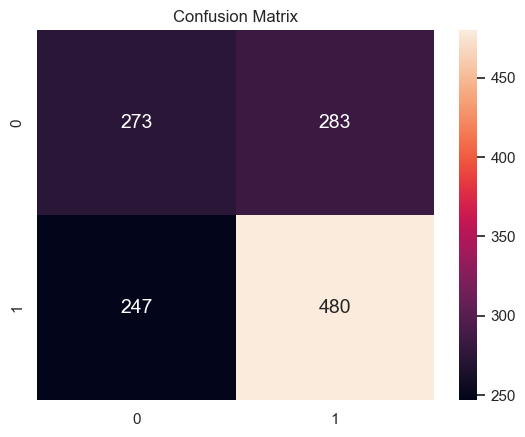


Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       556
           1       0.63      0.66      0.64       727

    accuracy                           0.59      1283
   macro avg       0.58      0.58      0.58      1283
weighted avg       0.58      0.59      0.58      1283



In [78]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))